# Basic Deep Learning - MNIST Fashion

Kita akan melatih jaringan NN untuk mengenali item pakaian dari dataset MNIST Fashion

https://github.com/zalandoresearch/fashion-mnist

Training set of 60,000 examples and a test set of 10,000 examples. Setiap item adalah gambar grayscale 28*28 pixel.

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.0


# A. Load Data

Data sudah tersedia di `tf.keras.datasets` API.

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Memanggil `load_data`. Objek ini akan memberikan dua set data. Tapi perlu didefinisikan mana yang gambar latih & label gambar latih.

In [3]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Check Sample Data

Kita akan cek seperti data yang telah kita miliki

Label 5
Data Image [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1
    1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0
    0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38
   99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146
  164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172
  146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71
    0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0

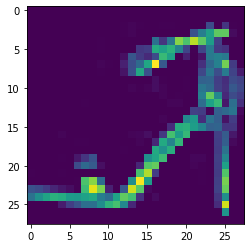

In [6]:
import matplotlib.pyplot as plt

# cek sample data dengan index tertentu
# [0] merupakan index pada data, anda bisa ganti index ini


plt.imshow(training_images[8])

print('Label', training_labels[8])
print('Data Image', training_images[8])

Data asli terdiri antara angka 0 dan 255. Jika kita latih dengan jaringan NN, itu akan lebih mudah jika kita buat semua nilainya diantara 0 dan 1. 

Proses ini yang disebut sebagai 'normalisasi'.

In [7]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Data Image [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.01176471 0.00392157 0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.22745098
  0.         0.15294118 0.00392157 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.    

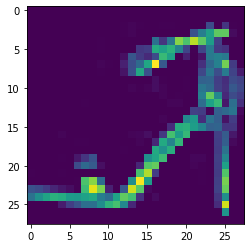

In [9]:
print('Data Image', training_images[8])
plt.imshow(training_images[8])

# B. Build the Model

In [10]:
# Definisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),        # hidden layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])     # output layer

Definisi:
1. **Sequential**: Mendefinisikan urutan lapisan dalam jaringan NN
2. **Flatten**: Mengubah gambar menjadi satu 1 dimensi. Ingat bahwa gambar kita berbentuk persegi 28x28. 784x1
3. **Dense**: Menambahkan lapisan neuron

Setiap lapisan neuron membutuhkan fungsi aktivasi untuk memberi tahu neuron mana yang aktif atau tidak (neuron mana yang mengandung informasi).
1. **Relu**: Jika x>0 mengembalikan x, jika tidak mengembalikan 0
2. **Softmax**: Mengambil satu set nilai, lalu memilih nilai yang terbesar. Misalnya pada output layer, NN mengembalikan nilai `[0.1, 0.2, 3.5, 0.1, 8.5, 7.5, 0.1]` maka softmax mengubahnya menjadi `[0, 0, 0, 0, 1, 0 ,0]`


# C.Compile the Model

Hal berikutnya, kita akan membungkus (membangun) model yang telah kita defenisikan sebelumnya.

Kita proses compile, kita menambahkan **optimizer** dan **loss function**. 

In [20]:
# Compile model

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
tf.random.set_seed(50)

#D. Train the Model

Latih jaringan NN dengan memanggil `model.fit`.

Kita meminta jaringan NN mencari tahu hubungan antara data latih dan label latih yang sebenarnya. Jadi, di masa datang, jika kita memiliki data yang tidak terlihat (data baru) , maka jaringan NN dapat membuat prediksi labelnya.

In [18]:
%%time

# Latih model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1948 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1918 - accuracy: 0.9282
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1851 - accuracy: 0.9301
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1821 - accuracy: 0.9322
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1766 - accuracy: 0.9335
CPU times: user 27.8 s, sys: 5.85 s, total: 33.7 s
Wall time: 21.9 s


# E. Evaluate the Model

In [19]:
# Evaluasi model

model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8905


[0.3492791950702667, 0.890500009059906]

# F. Eksplorasi

## Latihan 1

Membuat prediski model kita dapat memanggil `model.predict`

In [23]:
classifications = model.predict(test_images)

print(classifications[9])  # melihat hasil prediksi dari indeks ke-n

[6.83365378e-11 2.78170939e-14 1.29736786e-11 8.60902468e-14
 1.32014178e-13 1.53227472e-06 2.52606909e-14 9.99997616e-01
 4.70503747e-10 8.27654787e-07]


Menurut Anda, apa arti angka pada list tersebut?

**Pertanyaan:** Apa angka pada list tersebut?
1. Nilai acak
2. Hasil klasifikasi 10 teratas dari model
3. Probabilitas item dari masing-masing kelas

**Jawaban:** (3)

Output dari model yang merupakan probabilitas nilai yang diklasifikasikan oleh model.

In [24]:
print(test_labels[9])

7


## Latihan 2

Kita akan mencoba nilai yang berbeda untuk `dense layer`. Apakah hasilnya berbeda untuk loss, waktu pelatihan, dan akurasi?

In [25]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# Ganti jumlah neuron pada lapisan kedua
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),    
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.8.0


In [26]:
%%time
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4677 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3577 - accuracy: 0.8703
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8895
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2766 - accuracy: 0.8972
CPU times: user 28.4 s, sys: 5.78 s, total: 34.2 s
Wall time: 22.3 s


Artinya, ketika menambahkan lebih banyak neuron, model harus melakukan lebih banyak kalkulasi. 

Hasilnya blm tentu lebih baik. Tetapi waktu komputasi yang dibutuhkan akan meningkat.

## Latihan 3

Kita akan mencoba menghapus layer `flatten()`

In [27]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),    
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu),    
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.8.0


In [28]:
%%time
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


ValueError: ignored

Akan terjadi error ketika pelatihan. Karena kita perlu mengubah data gambar kita (28 x 28) menjadi bentuk 1 dimensi (784 x 1)

## Latihan 4

Kita akan mencoba mengubah nilai pada output layer. Misalnya kita ganti menjadi 5 neuron.

In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),    
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.8.0


In [30]:
%%time
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
CPU times: user 28.4 s, sys: 5.73 s, total: 34.1 s
Wall time: 22.2 s


Kode bisa dijalankan, tetapi tidak mengembalikan nilai loss dan akurasi yang sesuai. Kenapa ?

Neuron pada output layer harus sesuai dengan jumlah kelas yang akan kita klasifikasikan. Dalam kasus ini, kita memiliki 10 kelas. Maka, jumlah neuron pada output layer harus berjumlah 10.

## Latihan 5

Kita akan mencoba menambahkan jumlah lapisan `dense layer` pada jaringan. 

In [31]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(64, activation=tf.nn.relu),    
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.8.0


In [32]:
%%time
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5002 - accuracy: 0.8216
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3695 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3320 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3083 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2882 - accuracy: 0.8922
CPU times: user 29.4 s, sys: 5.86 s, total: 35.2 s
Wall time: 23.3 s


Bisa dikatakan, tidak ada pengaruh yang signifikan terhadap akurasi. Kenapa? karena data kita dalam kasus ini relatif sederhana. 

Untuk data yang jauh lebih kompleks, lapisan tambahan mungkin diperlukan.

Ini juga berpengaruh dengan waktu komputasi, semakin banyak lapisan maka semakin banyak kalkulasi yang dilakukan oleh model.

## Latihan 6

Kita akan mencoba dampak epoch terhadap proses pelatihan model.

In [36]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.8.0


In [34]:
%%time
model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5007 - accuracy: 0.8240
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8658
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8779
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8849
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9007
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9046
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9081
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [37]:
%%time
model.fit(training_images, training_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4984 - accuracy: 0.8258
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8648
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8781
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8853
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8909
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8969
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9016
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9040
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9080
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

Ketika kita coba menggunakan 30 epoch, kita melihat loss dan akurasi naik turun. Ini lah yang bisa kita sebut sebagai 'overfitting'. Jika perlu bijak ketika menentukan epoch.

## Latihan 7

Saat kita melatih dengan banyak epoch, kita tidak ingin model kita stuck. 

Daripada kita menunggu selesai pelatihan dengan jumlah epoch yang banyak. Kita ingin model kita berhenti belajar ketika akurasi / loss mencapai nilai yang ditentukan.

Kita akan terapkan callback.

In [39]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print('\nSudah sampai akurasi 90%, stop training!')
      self.model.stop_training = True

callback = myCallback()

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.8.0


In [40]:
%%time
model.fit(training_images, training_labels, epochs=30, callbacks=[callback])

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4971 - accuracy: 0.8251
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8654
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8774
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8847
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8919
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8975
Epoch 7/30
1857/1875 [============================>.] - ETA: 0s - loss: 0.2676 - accuracy: 0.9012
Sudah sampai akurasi 90%, stop training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9012
CPU times: user 38.8 s, sys: 8.2 s, total: 47 s
Wall time: 30.7 s
